In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
#
#
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names, len(data.target_names)

(['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 20)

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [52]:
vec = TfidfVectorizer()
mnb = MultinomialNB()

In [55]:
v = vec.fit_transform (train.data, train.target)

In [56]:
v.shape, type(v)

((2153, 35329), scipy.sparse.csr.csr_matrix)

In [58]:
import pandas as pd
df = pd.DataFrame(v.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,0000,00000,000000,000005102000,000021,000062david42,0000vec,0001,...,zwakke,zware,zwart,zwarte,zxmkr08,zyeh,zyxel,ªl,º_________________________________________________º_____________________º,ºnd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.shape

(2153, 35329)

In [60]:
len(train.data)

2153

In [61]:
a = v.toarray()
a.shape, type(a)

((2153, 35329), numpy.ndarray)

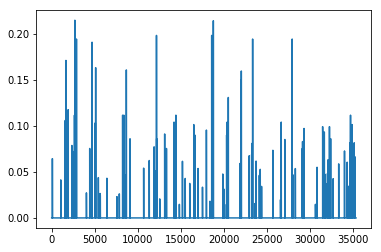

In [62]:
a[0]
plt.plot(a[0])

In [63]:
np.unique(train.target)

array([0, 1, 2, 3])

In [64]:
mnb.fit (a, train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
mnb.feature_log_prob_.shape

(4, 35329)

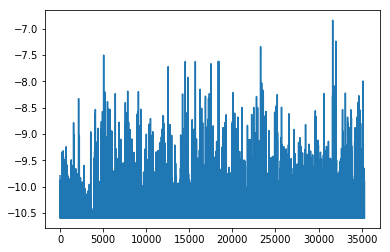

In [66]:
plt.plot (mnb.feature_log_prob_[0])

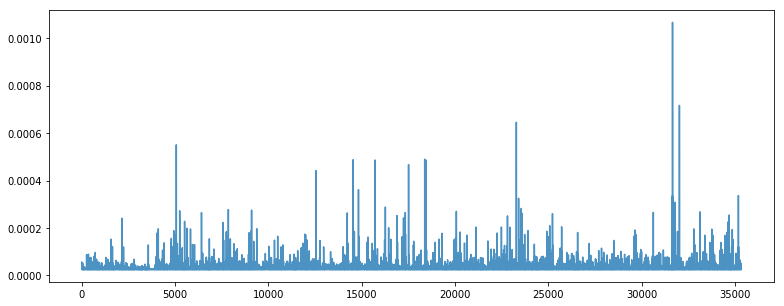

In [77]:
plt.figure(figsize=(13,5))
plt.plot(np.exp(mnb.feature_log_prob_[0]), alpha=0.8)
#plt.plot(np.exp(mnb.feature_log_prob_[1]), alpha=0.2)

Without removing stopwords, the result shows a quite unexpected ...

In [78]:
feats = vec.get_feature_names()    
for lp in mnb.feature_log_prob_:
    am = np.argmax(mnb.feature_log_prob_[0])
    print (feats[am])

the
the
the
the
